# Neccessary Library Imports

In [2]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pandas as pd
import os

# load the dataset

In [3]:
def load_dataset(path):
    faces_dataset = pd.read_csv(path)
    names = faces_dataset['784']
    train_face = faces_dataset.drop('784',axis=1)
    return train_face,names

# convert the train dataset to numpy array

In [4]:
def convert_dataframe_to_numpy(dataframe):
    images = train_face.to_numpy()
    return images

# Find the mean face

In [5]:
def find_mean_face(images):
    mean_face =np.zeros((1,28,28))
    for index in range(len(images)):
        mean_face = np.add(mean_face,images[index].reshape(28,28))
    mean_face = np.divide(mean_face,float(len(images))).flatten()
    plt.imshow(mean_face.reshape(28, 28), cmap='gray')
    return mean_face
    

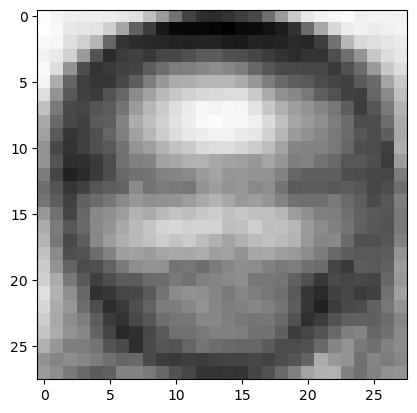

In [6]:
path = 'faces_dataset.csv'
train_face,names = load_dataset(path)
images = convert_dataframe_to_numpy(train_face)
mean_face = find_mean_face(images)

In [6]:
print(mean_face)

[156.90909091 153.34848485 151.66666667 150.6969697  151.13636364
 149.75757576 148.07575758 145.28787879 132.24242424 117.66666667
 101.8030303   82.59090909  74.28787879  73.13636364  76.5
  80.68181818  84.28787879 100.16666667 117.71212121 136.15151515
 148.13636364 152.16666667 154.27272727 155.37878788 151.09090909
 152.43939394 152.25757576 151.51515152 157.6969697  154.56060606
 148.42424242 147.12121212 146.24242424 138.28787879 121.74242424
  95.25757576  79.95454545  65.57575758  59.36363636  58.75757576
  58.93939394  58.01515152  55.90909091  60.15151515  60.75757576
  63.43939394  67.56060606  76.09090909  98.54545455 122.77272727
 141.77272727 149.93939394 151.34848485 150.01515152 151.34848485
 152.86363636 154.66666667 153.95454545 144.8030303  138.74242424
 127.96969697  96.8030303   77.09090909  73.63636364  71.95454545
  71.03030303  70.36363636  69.75757576  70.65151515  70.15151515
  67.06060606  66.46969697  70.56060606  69.57575758  70.60606061
  73.07575758  71

In [7]:
# normalized images 
def normalized(images,mean_face):
    normalized_images = images - mean_face
    for i in range(len(images)):
        img = normalized_images[i].reshape(28,28)
        plt.imshow(img, cmap='gray')
        plt.show()
    return normalized_images

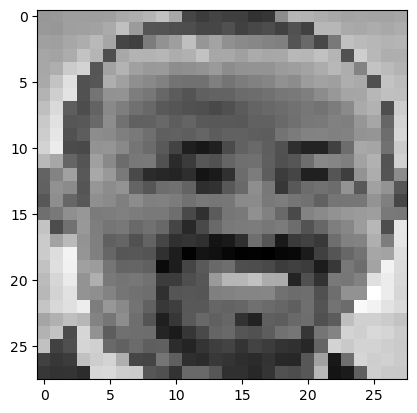

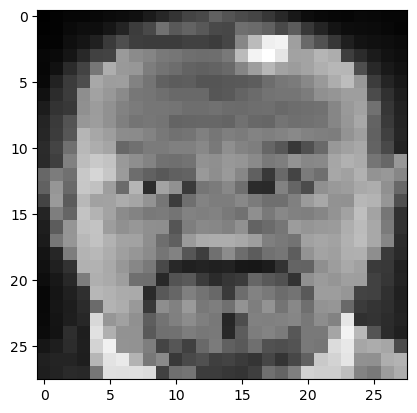

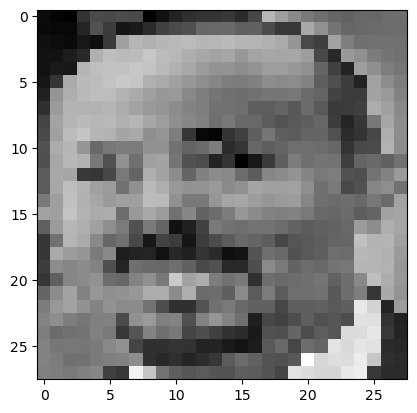

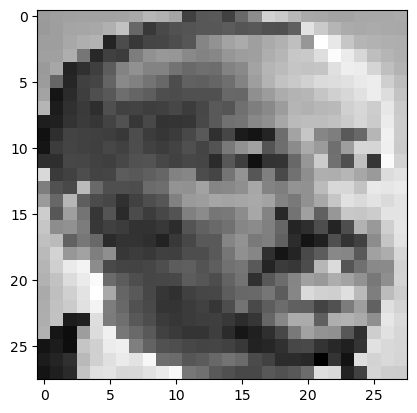

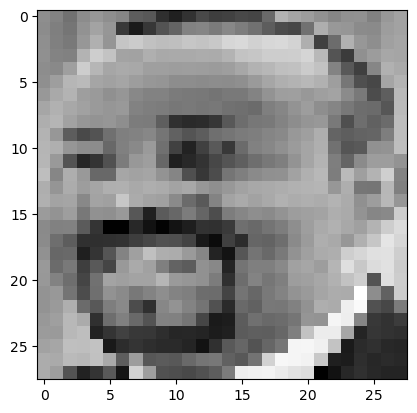

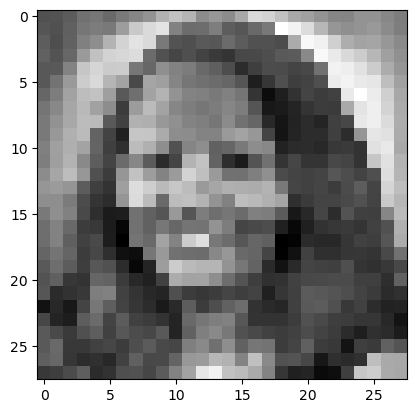

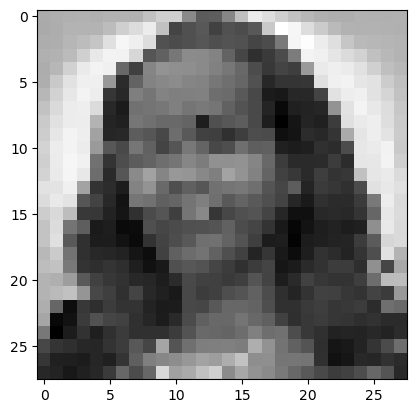

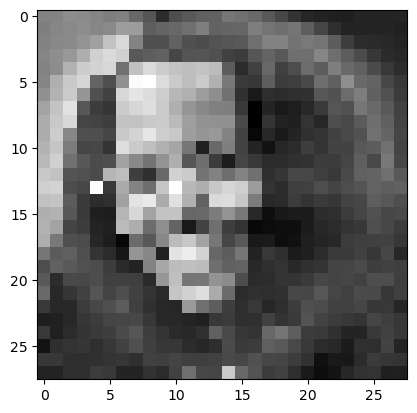

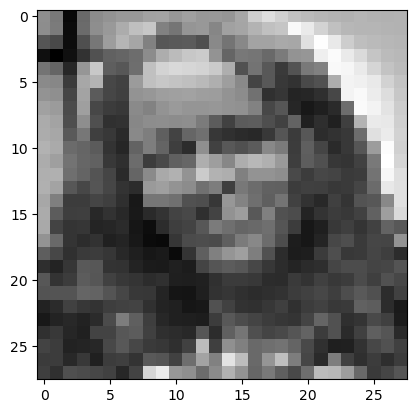

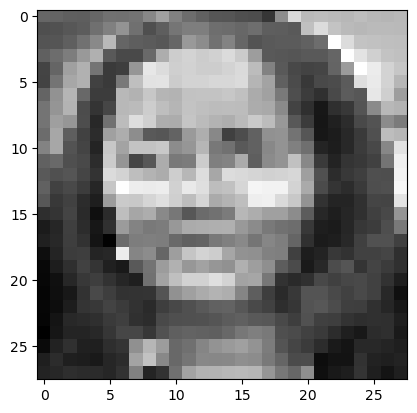

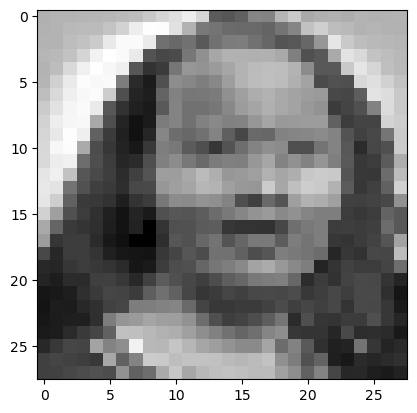

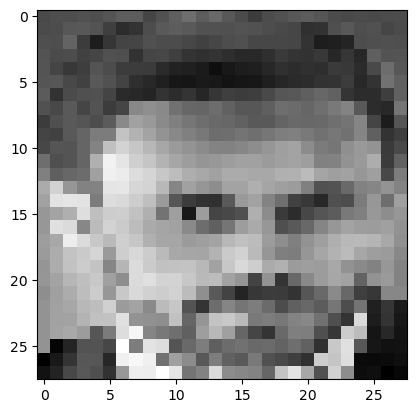

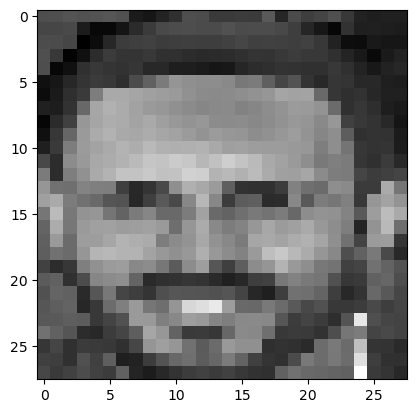

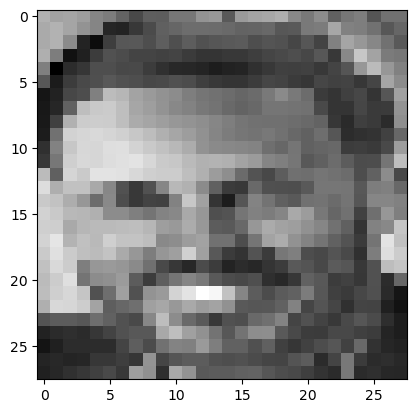

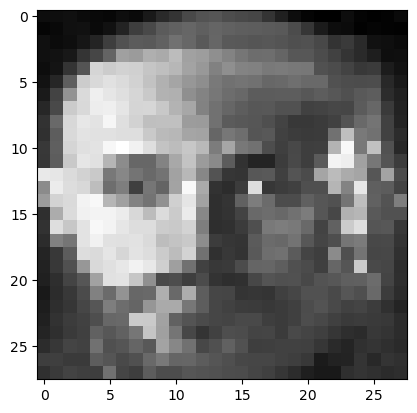

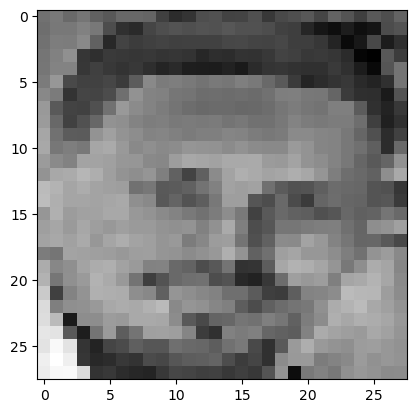

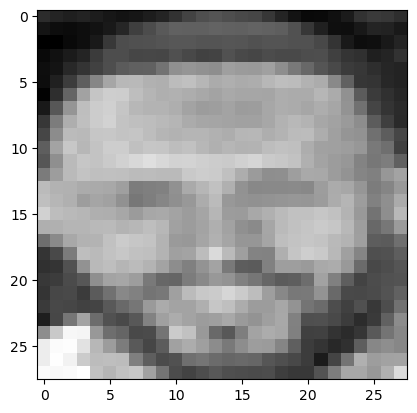

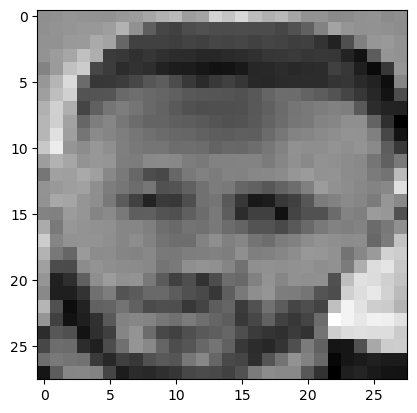

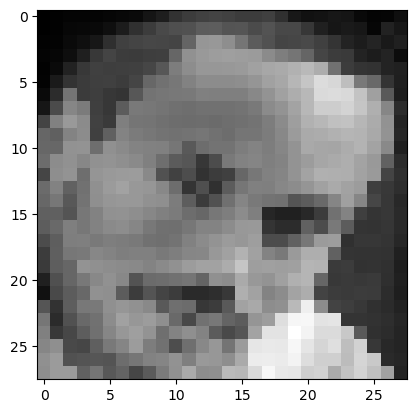

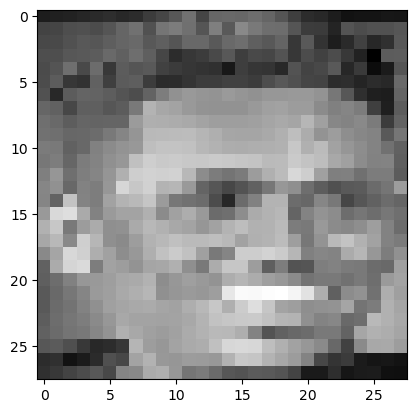

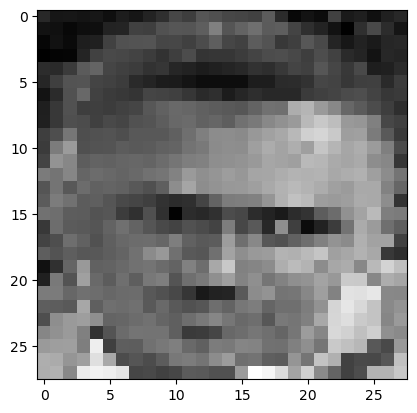

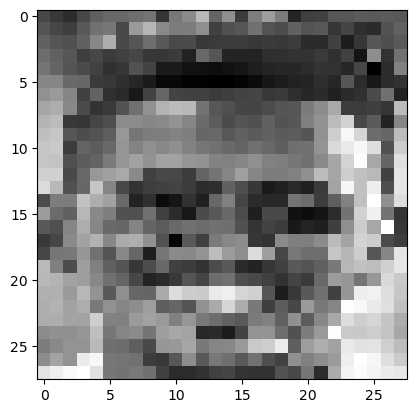

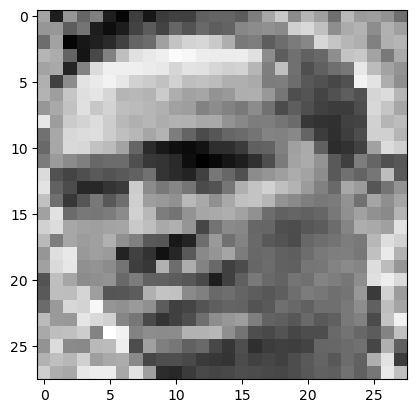

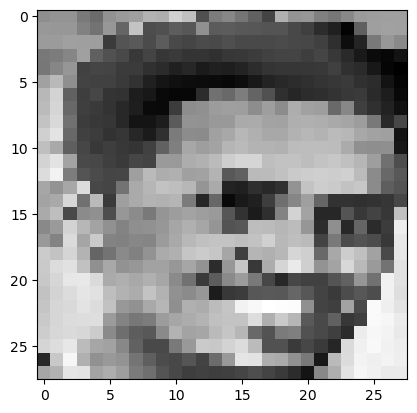

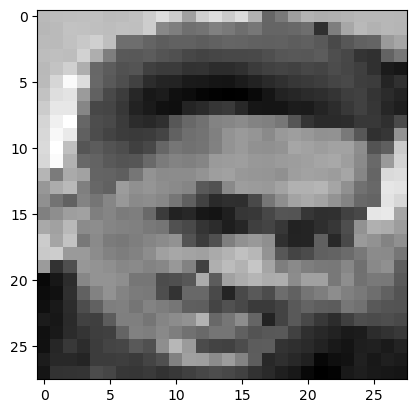

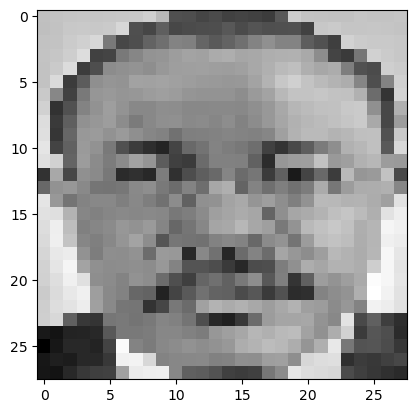

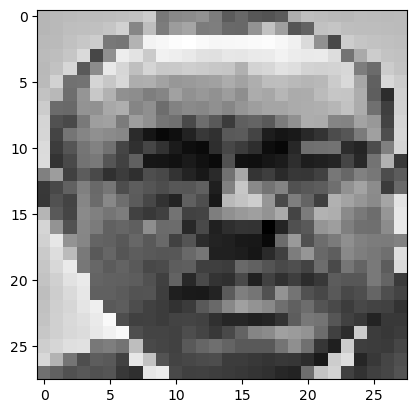

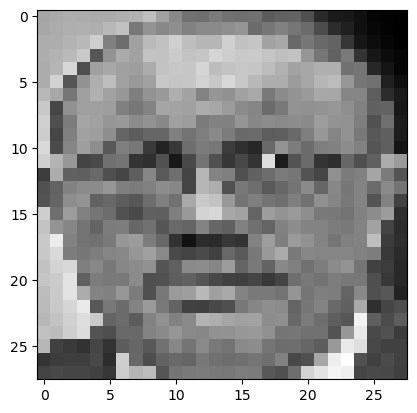

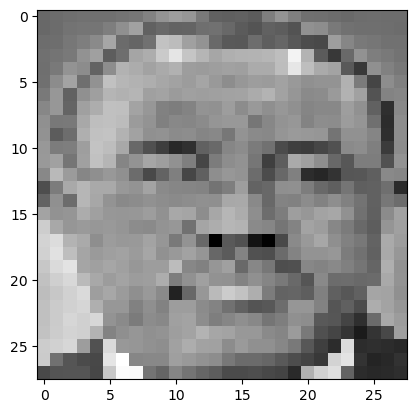

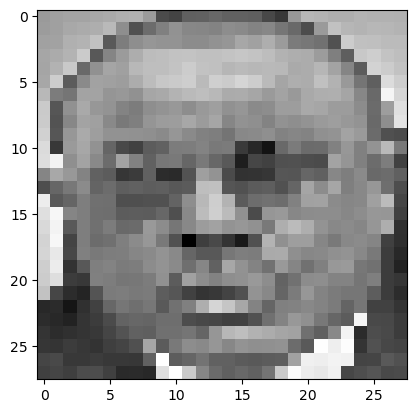

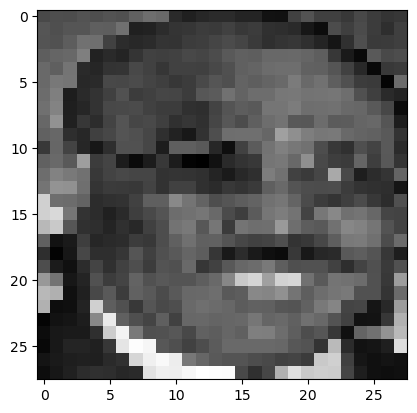

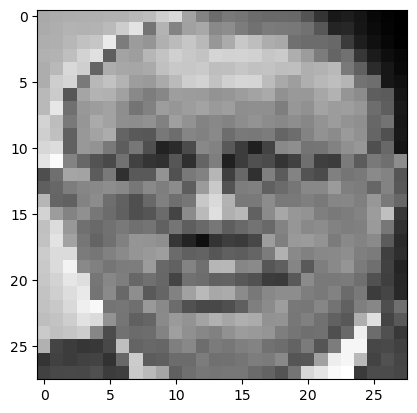

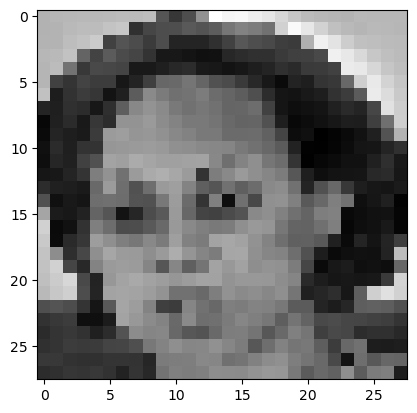

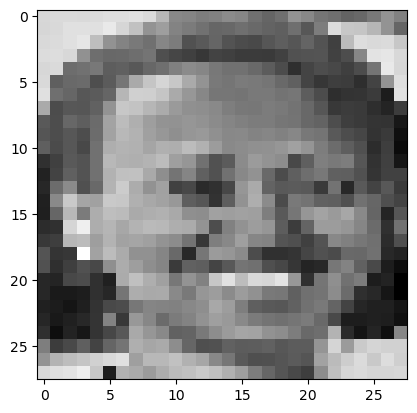

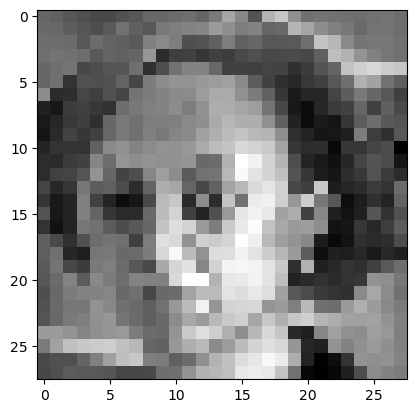

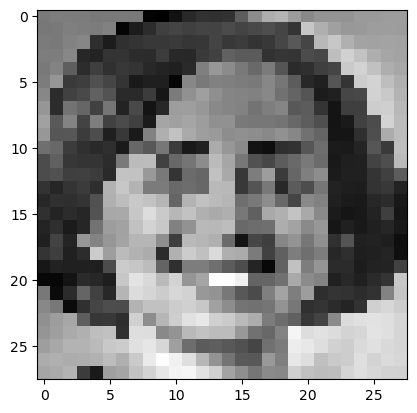

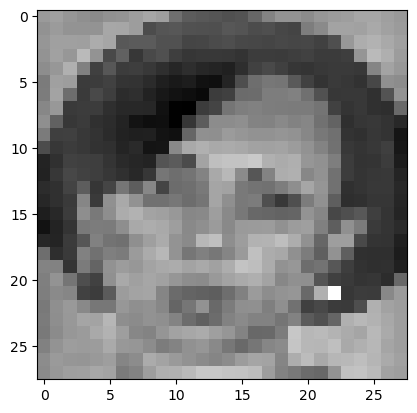

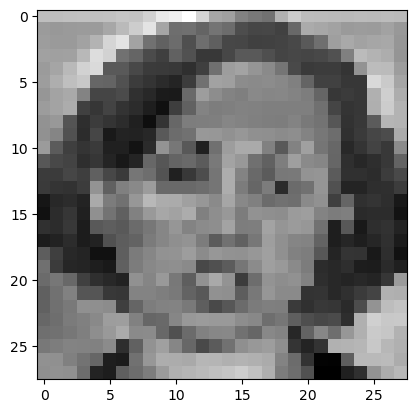

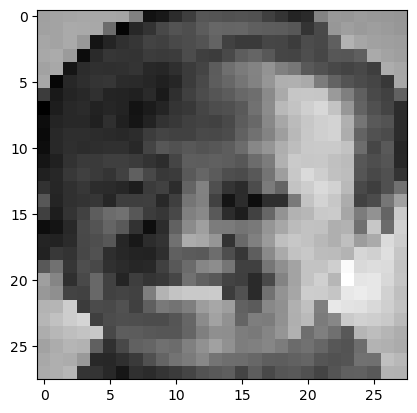

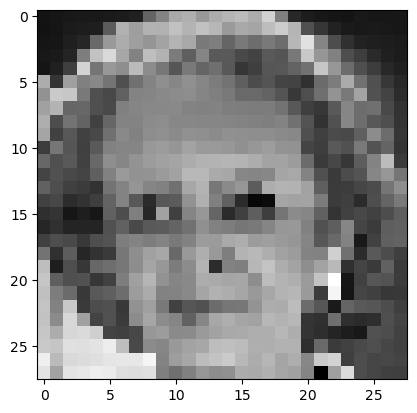

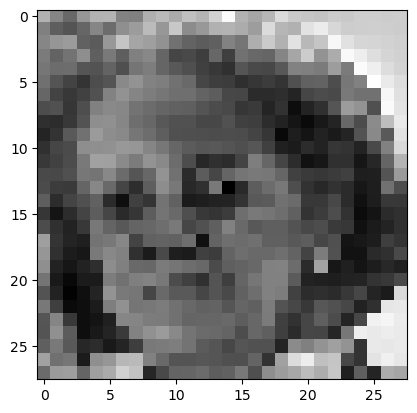

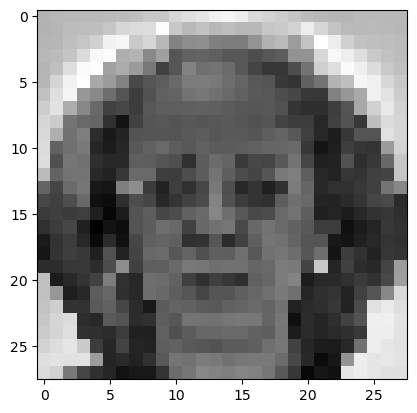

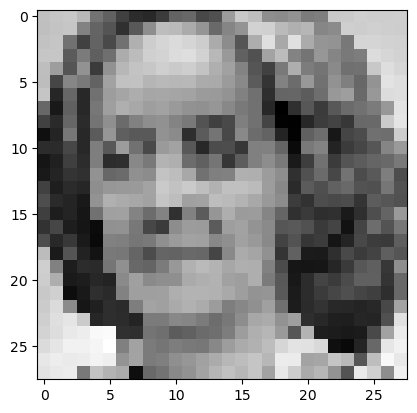

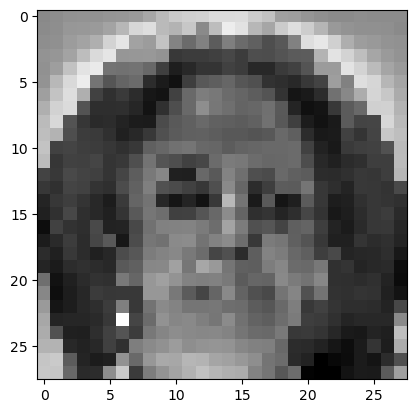

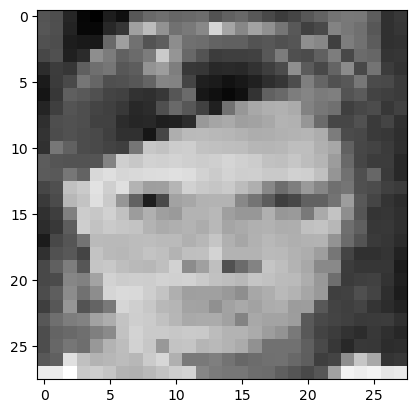

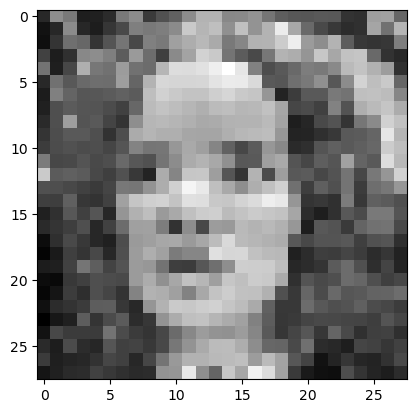

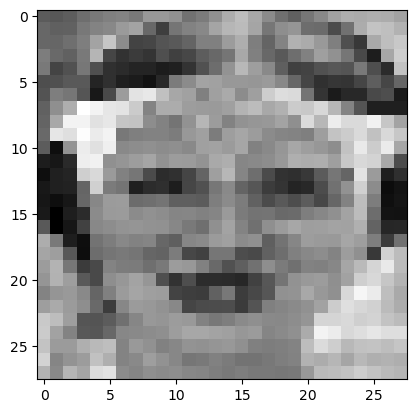

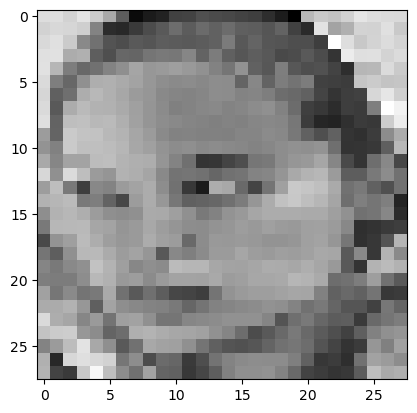

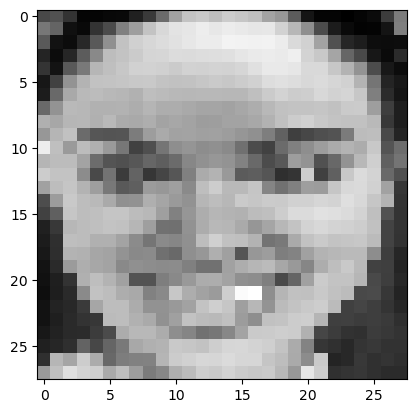

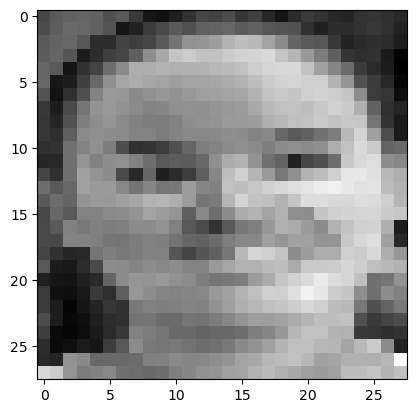

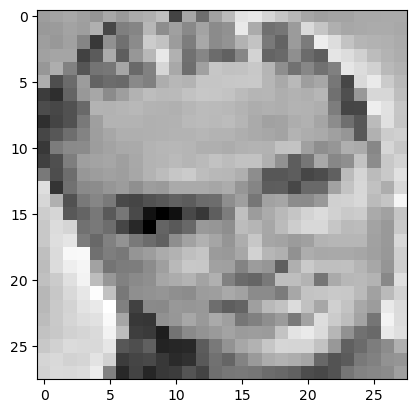

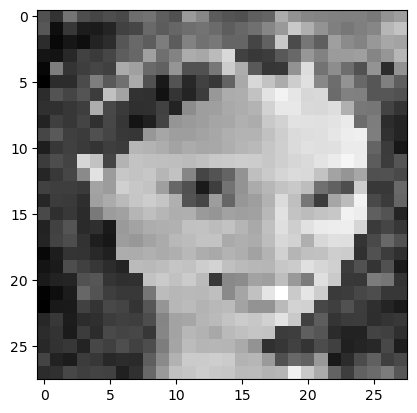

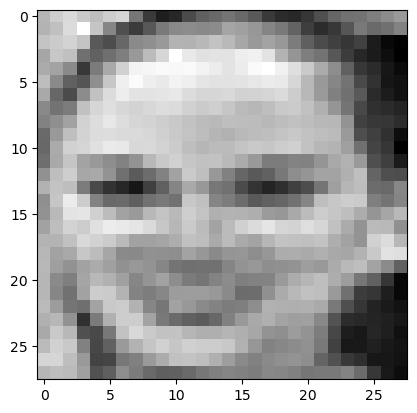

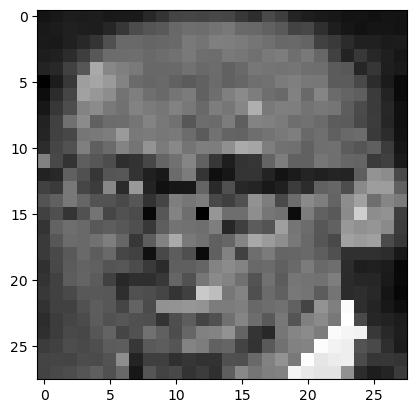

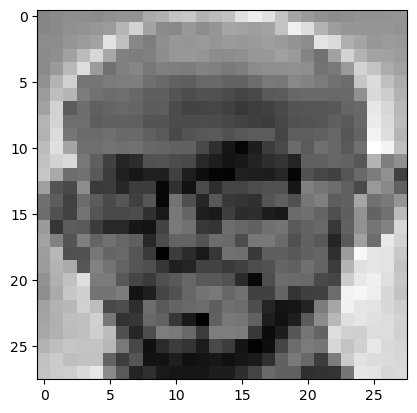

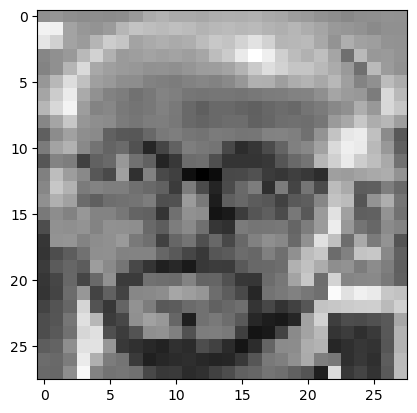

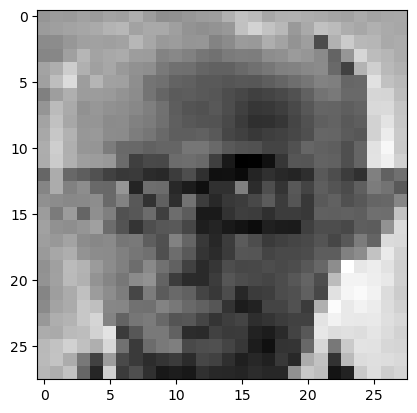

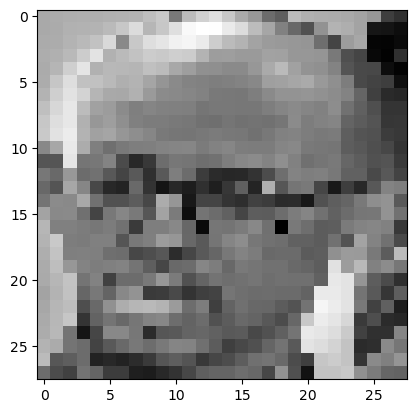

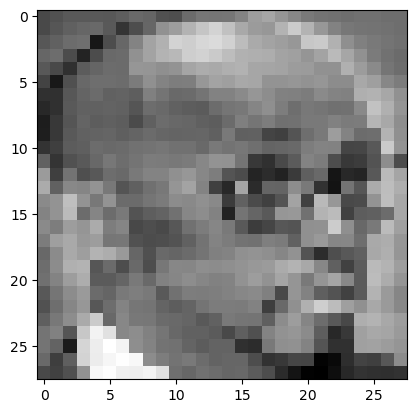

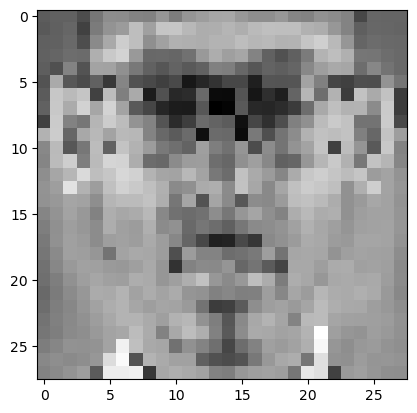

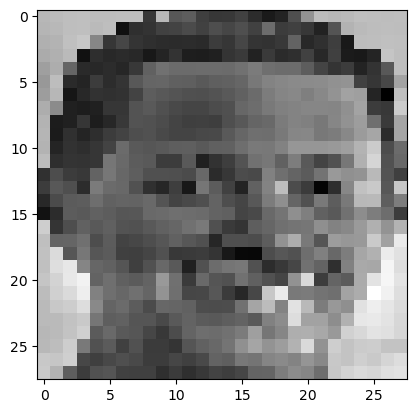

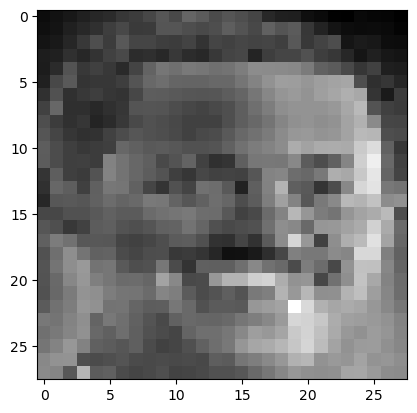

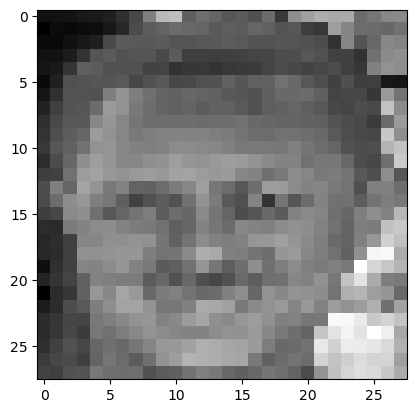

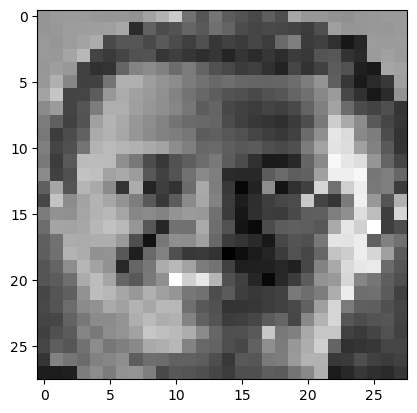

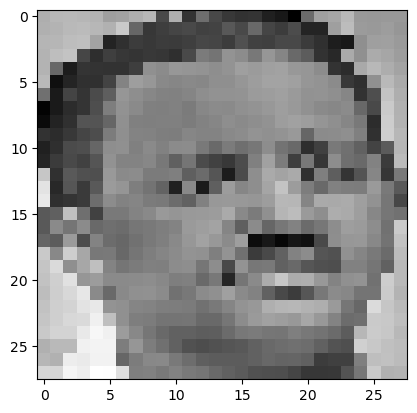

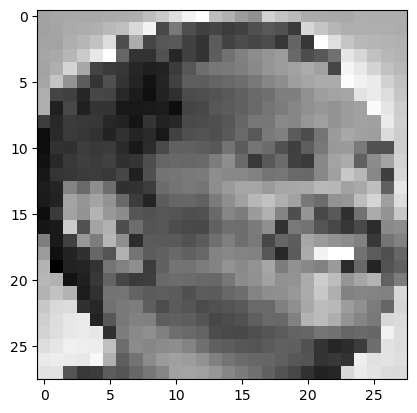

In [8]:
normalized_images = normalized(images,mean_face)

# Covariance matrix

In [9]:
def find_cov_matrix(normalized_images):
    cov_matrix = np.cov(normalized_images)
    cov_matrix = np.divide(cov_matrix,float(len(images)))
    return cov_matrix


In [10]:
cov_matrix = find_cov_matrix(normalized_images)
print(cov_matrix)

[[ 43.34942119  -8.82287907   5.81551879 ...   1.44862859  10.7302246
    7.39996614]
 [ -8.82287907  62.32729      8.69357734 ...   5.57142102  -8.82887197
  -13.82578451]
 [  5.81551879   8.69357734  32.15187596 ...  -1.28450084  -3.72325895
   -9.13508871]
 ...
 [  1.44862859   5.57142102  -1.28450084 ...  32.96057289   1.66062902
   -3.82847042]
 [ 10.7302246   -8.82887197  -3.72325895 ...   1.66062902  42.21928066
    9.92149832]
 [  7.39996614 -13.82578451  -9.13508871 ...  -3.82847042   9.92149832
   41.87031353]]


# find the eigenvalues and eigenvectors of the covariance matrix

In [11]:
def find_eigen_values_and_vectors(cov_matrix):
    return np.linalg.eig(cov_matrix)

In [12]:
eigen_values,eigen_vectors = find_eigen_values_and_vectors(cov_matrix)

In [13]:
print(eigen_values)

[ 4.68971030e+02  2.82913659e+02  2.68587017e+02  1.55013463e+02
  1.31359086e+02  1.28704517e+02  1.05916219e+02  8.30606710e+01
  8.10711947e+01  6.82761978e+01  5.73612754e+01  5.57043582e+01
  5.29747451e+01  4.66180099e+01  4.09836530e+01  3.92538602e+01
  3.70605207e+01  3.51376913e+01  3.21087562e+01  3.00196982e+01
  2.93856321e+01  2.76101325e+01  2.59622399e+01  2.55570002e+01
  2.49578990e+01 -1.26857533e-14  2.39727804e+01  2.31870647e+01
  2.09624108e+01  2.06218802e+01  1.94101281e+01  1.88994066e+01
  2.77436312e+00  1.76463516e+01  1.67981474e+01  1.67475444e+01
  1.63064867e+01  1.56266485e+01  3.89525962e+00  4.40750461e+00
  4.65417651e+00  1.44286704e+01  1.39469874e+01  1.34129540e+01
  1.31589743e+01  5.40773043e+00  5.76522442e+00  1.24453105e+01
  1.21035500e+01  1.16582227e+01  6.11207018e+00  6.29869394e+00
  6.63222907e+00  6.97914191e+00  7.12350958e+00  7.48654224e+00
  7.73810905e+00  7.90906591e+00  8.41434599e+00  1.09659214e+01
  9.04460094e+00  9.32438

In [14]:
print(eigen_vectors)

[[-0.15146557 -0.08066287  0.19269955 ... -0.03659692  0.04315034
   0.00117043]
 [ 0.22096397  0.13151312  0.11093384 ...  0.14484379  0.05895215
  -0.03486543]
 [ 0.00719236  0.08581433  0.10664428 ...  0.03437457  0.10754227
  -0.30925697]
 ...
 [ 0.03589464 -0.0169672   0.1166401  ... -0.34399215  0.17257003
  -0.06130511]
 [-0.01087122 -0.18407403  0.05685337 ...  0.03805858  0.09289829
   0.04483129]
 [-0.11012279 -0.17031975 -0.03579239 ...  0.12351882 -0.19060244
   0.05507425]]


In [15]:
def find_eigen_pairs(eigen_values,eigen_vectors):
    eigen_pairs =[]
    for index in range(len(eigen_values)):
        eigen_pairs.append((eigen_values[index],eigen_vectors[index]))
    return eigen_pairs

In [16]:
eigen_pairs = find_eigen_pairs(eigen_values,eigen_vectors)
print(eigen_pairs)

[(468.97103012644925, array([-1.51465573e-01, -8.06628748e-02,  1.92699553e-01,  3.49304291e-04,
       -7.30255407e-02,  2.29297612e-02, -5.32571548e-02,  4.95367265e-02,
       -7.94869220e-02, -1.28387610e-01, -7.29752907e-02, -3.43683711e-02,
        3.53347027e-02, -2.56598117e-01, -9.56290557e-02,  1.12402112e-01,
       -9.49678044e-02, -4.03702304e-02, -9.64918246e-02,  1.57031762e-01,
        3.69250549e-01, -6.32803243e-02, -1.24542362e-01,  3.43844377e-02,
       -1.01197061e-01, -1.23091491e-01, -8.63740070e-02, -1.41777357e-01,
       -1.09196602e-01,  1.12005140e-02, -3.91426855e-02,  4.76047047e-02,
       -2.59506924e-03,  9.32232430e-02, -7.97411002e-02,  1.06524395e-01,
       -1.16913295e-01, -2.83484763e-01,  2.74923483e-02,  6.69251799e-02,
        3.03514705e-02,  3.13069570e-01,  4.95454026e-02,  1.11119023e-01,
        1.77419704e-01,  6.34973471e-03, -1.38380379e-01, -1.16351595e-01,
       -1.45807311e-01,  1.28694387e-01,  1.12238440e-01, -3.16876323e-02,
   

In [17]:
# Sort the eigen pairs in descending order:
eigen_pairs.sort(reverse=True)
eigen_values_sort  = [eigen_pairs[index][0] for index in range(len(eigen_values))]
eigen_vectors_sort = [eigen_pairs[index][1] for index in range(len(eigen_values))]
print(eigen_values_sort)

[468.97103012644925, 282.9136594929163, 268.5870172929762, 155.01346325959307, 131.35908636296986, 128.70451655368754, 105.91621852189145, 83.06067104361216, 81.071194717607, 68.27619781443282, 57.36127535113171, 55.704358222829555, 52.974745101990194, 46.618009864157095, 40.98365298332443, 39.253860160664246, 37.060520656580124, 35.13769134919115, 32.10875618672709, 30.019698178245587, 29.385632094951827, 27.61013245653425, 25.962239933155377, 25.557000232623707, 24.957899015556027, 23.972780390842686, 23.187064728804298, 20.962410781243758, 20.621880215404435, 19.410128134935068, 18.899406624880296, 17.646351628820664, 16.79814742493605, 16.74754436539055, 16.306486742249977, 15.62664846765059, 14.428670438517354, 13.946987449431779, 13.412953988324377, 13.158974275763445, 12.445310494021426, 12.103549992365245, 11.65822265502453, 10.965921370553863, 10.540808801409216, 10.342401615690225, 9.9188073553096, 9.749785664765357, 9.324384992992885, 9.044600942024898, 8.414345990860513, 7.

In [18]:
print(eigen_vectors_sort)

[array([-1.51465573e-01, -8.06628748e-02,  1.92699553e-01,  3.49304291e-04,
       -7.30255407e-02,  2.29297612e-02, -5.32571548e-02,  4.95367265e-02,
       -7.94869220e-02, -1.28387610e-01, -7.29752907e-02, -3.43683711e-02,
        3.53347027e-02, -2.56598117e-01, -9.56290557e-02,  1.12402112e-01,
       -9.49678044e-02, -4.03702304e-02, -9.64918246e-02,  1.57031762e-01,
        3.69250549e-01, -6.32803243e-02, -1.24542362e-01,  3.43844377e-02,
       -1.01197061e-01, -1.23091491e-01, -8.63740070e-02, -1.41777357e-01,
       -1.09196602e-01,  1.12005140e-02, -3.91426855e-02,  4.76047047e-02,
       -2.59506924e-03,  9.32232430e-02, -7.97411002e-02,  1.06524395e-01,
       -1.16913295e-01, -2.83484763e-01,  2.74923483e-02,  6.69251799e-02,
        3.03514705e-02,  3.13069570e-01,  4.95454026e-02,  1.11119023e-01,
        1.77419704e-01,  6.34973471e-03, -1.38380379e-01, -1.16351595e-01,
       -1.45807311e-01,  1.28694387e-01,  1.12238440e-01, -3.16876323e-02,
        6.67315970e-02, 

# Find cumulative variance of each principle component
- A widely applied approach is to decide on the number of principal components by examining a scree plot. By eyeballing the scree plot, and looking for a point at which the proportion of variance explained by each subsequent principal component drops off. This is often referred to as an elbow in the scree plot. Let us plot the proportion of explained variance by each particular principal component with their absolute values and as cumulative sums 

Cumulative proportion of variance explained vector: 
[0.16764612 0.2687811  0.36479465 0.42020832 0.4671661  0.51317494
 0.5510375  0.58072974 0.60971079 0.63411792 0.65462323 0.67453623
 0.69347345 0.7101383  0.72478899 0.73882132 0.75206959 0.76463049
 0.77610861 0.78683995 0.79734462 0.80721459 0.81649548 0.82563151
 0.83455337 0.84312308 0.85141191 0.85890548 0.86627732 0.87321598
 0.87997207 0.88628023 0.89228517 0.89827203 0.90410121 0.90968737
 0.91484528 0.919831   0.92462582 0.92932984 0.93377875 0.93810548
 0.94227302 0.94619308 0.94996117 0.95365834 0.95720408 0.9606894
 0.96402265 0.96725588 0.97026381 0.97309112 0.97585731 0.97853357
 0.98108006 0.98357494 0.9859458  0.98819744 0.99038236 0.99244329
 0.99437643 0.99604019 0.99761577 0.99900823 1.         1.        ]


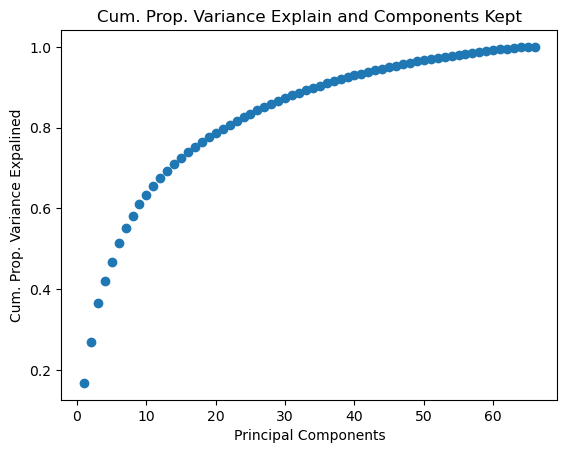

In [19]:
var_comp_sum = np.cumsum(eigen_values_sort)/sum(eigen_values_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigen_values_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

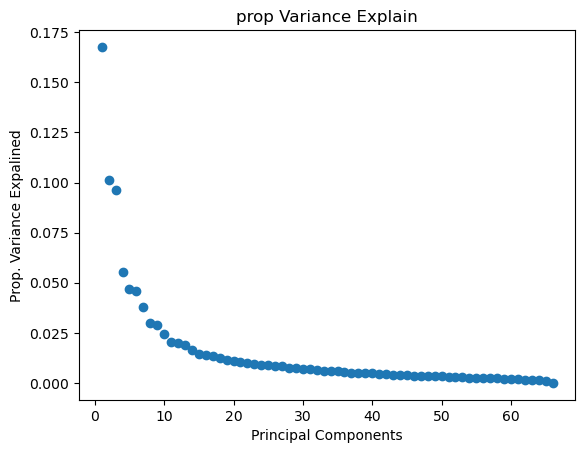

In [20]:
var_comp = eigen_values_sort/sum(eigen_values_sort)
# x-axis for number of principal components kept
num_comp = range(1,len(eigen_values_sort)+1)
plt.title('prop Variance Explain')
plt.xlabel('Principal Components')
plt.ylabel('Prop. Variance Expalined')

plt.scatter(num_comp, var_comp)
plt.show()

- from the above scree plots we can see that the elbow starts at 10. so we can take the first 15 eigenvectors as a principal component to reduce the dataset from 58 components to 15 

In [21]:
reduced_data = np.array(eigen_vectors_sort[:15]).transpose()
print(reduced_data)

[[-1.51465573e-01  2.20963975e-01  7.19235671e-03 -1.09159342e-01
  -4.82671836e-02 -1.16308111e-01 -2.98019430e-01 -4.47345312e-02
  -1.93601911e-01 -5.45571865e-02 -1.86806614e-01  1.72767399e-01
   1.94670575e-01  3.45354488e-02  1.56779589e-01]
 [-8.06628748e-02  1.31513116e-01  8.58143250e-02 -6.52256019e-02
   4.95230707e-02  1.16361478e-01  1.75509864e-01  1.72333384e-01
   1.59251517e-01  1.32788828e-01  1.55876511e-01 -4.66320339e-02
   2.34438631e-02  3.26160934e-02  2.24648059e-01]
 [ 1.92699553e-01  1.10933842e-01  1.06644284e-01  1.14771369e-01
   1.23736984e-01 -1.07439070e-01 -2.20256727e-02 -3.53025845e-02
  -9.19988187e-02 -1.87261357e-01 -1.50193485e-01 -2.12211567e-02
  -4.50050752e-02 -1.68509511e-02  4.71937783e-02]
 [ 3.49304291e-04  5.32485099e-02 -8.68236394e-03  1.16270075e-01
   7.17213234e-02 -8.70715277e-02 -2.25455788e-01 -1.70571159e-01
   5.11313850e-03  4.71237595e-03 -2.20391926e-02 -2.34921466e-01
  -1.47823248e-01 -2.11397875e-01 -2.32015863e-01]
 [-7

In [22]:
print(np.cov(reduced_data))

[[ 0.02483882 -0.00186582  0.00351593 ... -0.00016621  0.0010821
   0.00133943]
 [-0.00186582  0.00902969 -0.00500946 ...  0.00717089  0.00341584
  -0.0012257 ]
 [ 0.00351593 -0.00500946  0.01240162 ... -0.00181403  0.002388
  -0.00493659]
 ...
 [-0.00016621  0.00717089 -0.00181403 ...  0.01685203  0.00748999
  -0.00072934]
 [ 0.0010821   0.00341584  0.002388   ...  0.00748999  0.01596293
  -0.00164447]
 [ 0.00133943 -0.0012257  -0.00493659 ... -0.00072934 -0.00164447
   0.01181899]]


# Now we try to find the projected data. This will form the eigen space.

In [23]:
projected_data = np.dot(normalized_images.transpose(),reduced_data)
projected_data = projected_data.transpose()

In [24]:
print(projected_data)

[[ -44.35402812  -23.56599087  -28.62294278 ...  210.51207835
   182.84045408  208.26880311]
 [  -2.74090983  -15.18231483   -3.69045352 ...   30.65145835
    50.24225464   36.9680684 ]
 [ -65.88599126  -52.59804429  -66.35750496 ...  -12.02957999
   -40.86647892  -34.07926109]
 ...
 [  22.82039042    9.63577543   -2.70326578 ...  191.16120284
   204.04674183  197.65074998]
 [-154.37784899 -147.47251546 -122.55794196 ...   23.99606997
   -33.23282707  -49.23138807]
 [ -17.07758974  -37.63025973  -26.81703598 ...   14.58120232
    50.20732732   40.10256559]]


# Plot eigen faces

In [25]:
def plot_eigen_faces(projected_data):
    for i in range(projected_data.shape[0]):
        img = projected_data[i].reshape(28,28)
        plt.imshow(img, cmap='gray')
        plt.show()
   

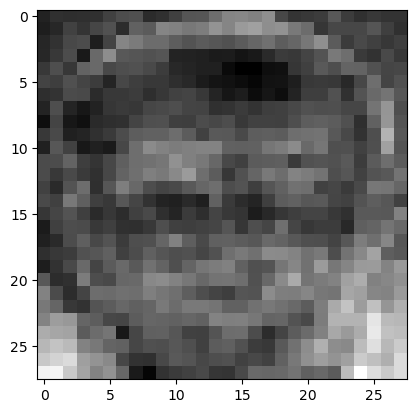

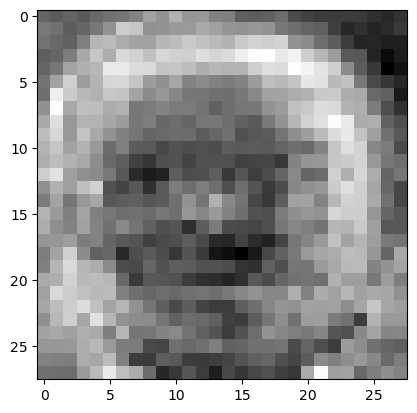

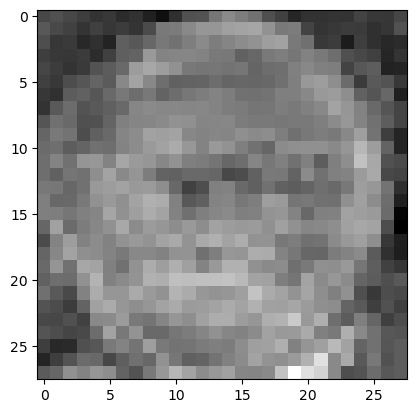

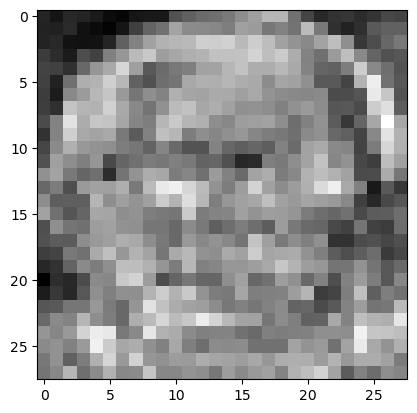

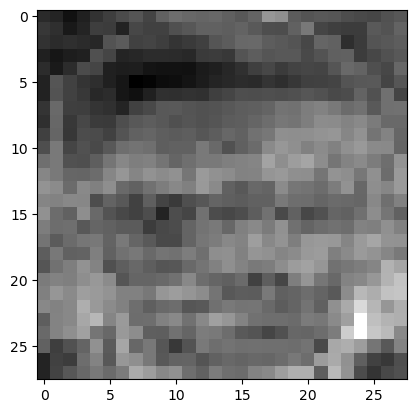

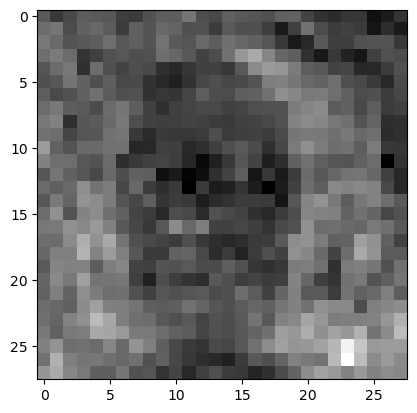

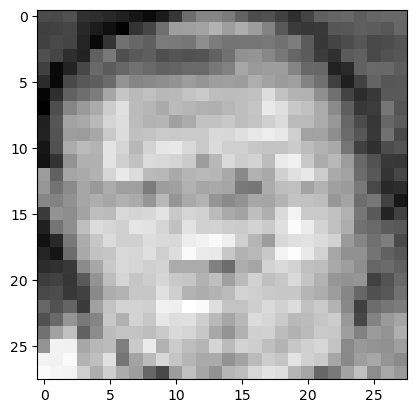

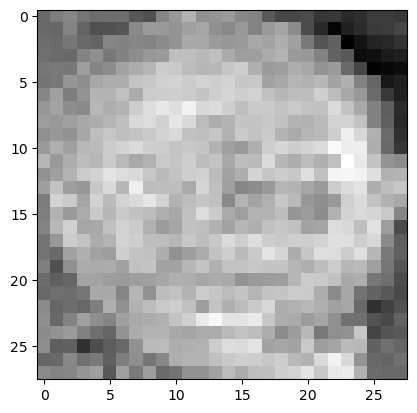

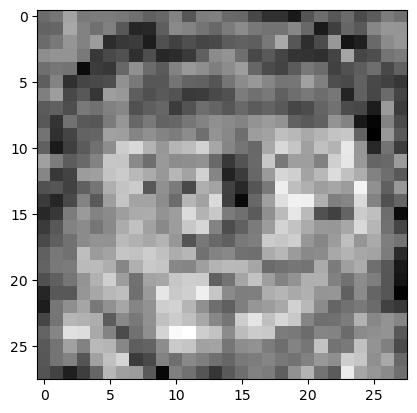

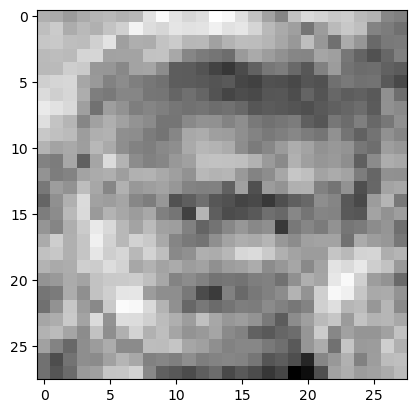

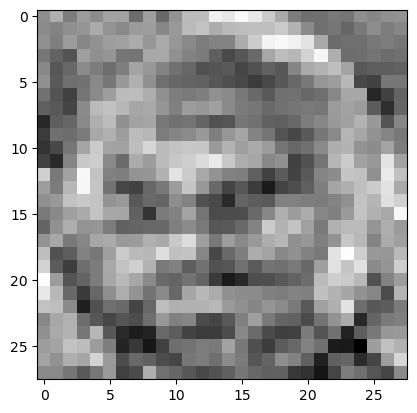

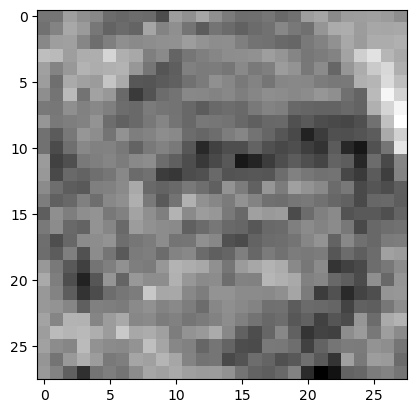

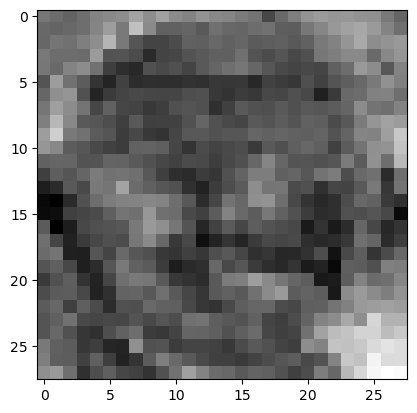

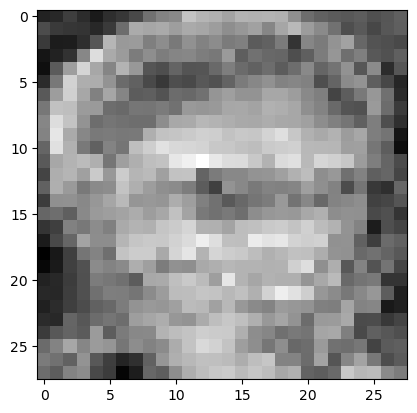

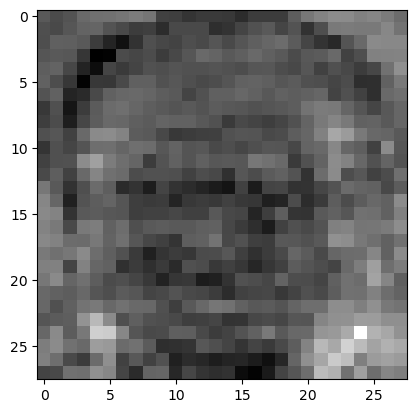

In [26]:
plot_eigen_faces(projected_data)

# Finding weights for each traning image

In [27]:
def find_weights(projected_data):
    w = np.array([np.dot(projected_data,image) for image in normalized_images])
    return w


# Now we recognise unknown face!

In [28]:
def convert_to_vector(image):
    unknown_face_vector = cv.resize((cv.imread(image,0)),(28,28)).reshape(784)
    return unknown_face_vector


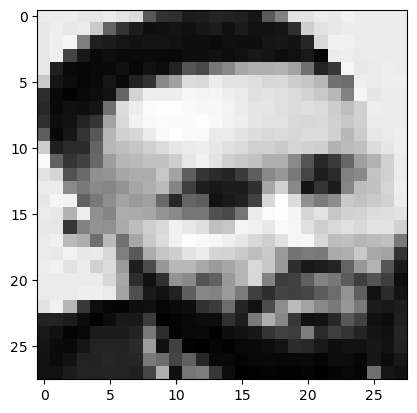

In [46]:
image_path = 'test_set/test.jpeg'
unknown_face_vector =  convert_to_vector(image_path)
plt.imshow(unknown_face_vector.reshape(28,28),cmap='gray')


In [47]:
def normalize_image(unknown_face_vector,mean_face):
    normalized_image = unknown_face_vector-mean_face
    return normalized_image

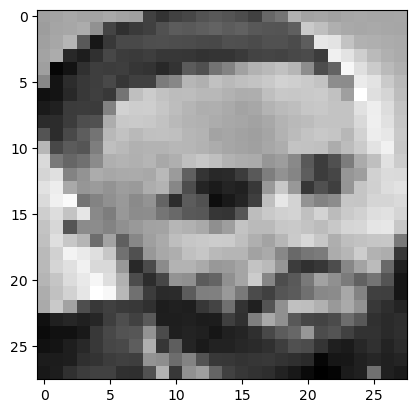

In [48]:
normalized_image = normalize_image(unknown_face_vector,mean_face)
plt.imshow(normalized_image.reshape(28,28),cmap='gray')

# Wieghts of uknown face
Projecting the normalized vector onto the eigenspace, to find out the weights

In [49]:
def find_weight_unknown(projected_data,normalized_image):
    w_unknown = np.dot(projected_data, normalized_image)
    return w_unknown

In [50]:
print(find_weight_unknown(projected_data,normalized_image))

[-564847.37010632 -249211.93285409  110025.4972269  -581717.39553419
   41529.46964699 -289044.60601195 -252434.4755418    57280.51994442
  -59101.0900072  -253094.58546107  236927.6512493  -181719.59313078
 -550723.57865846 -287838.80589509    1343.64717049]


# Calculate the Euclidean norm or distance between each image and the unknown image given for prediction

In [51]:
def find_norm(w,w_unknown):
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    return norms
w= find_weights(projected_data)
w_unknown = find_weight_unknown(projected_data,normalized_image)
norms = find_norm(w,w_unknown)
print(norms)

[4460019.37201433 3864780.30945873 2444061.77770434 2746843.90243647
 2659953.94257367 3037833.44512679 4359609.62450093 3068563.01407744
 3086149.60782882 2961636.23062275 2904300.80740196 2791262.71550587
 3817690.41780829 3089674.20988859 4878365.71715356 2224177.19340444
 3942197.07424354 1940185.10307119 4682001.86959426 3219391.54788631
 3545111.32564393 3210479.57637072 3589656.93577792 2758604.14371529
 2144785.5176177  4089503.18642837 5097023.42134323 1999399.85319003
 2353704.35057629 1471496.56344985 2117044.05574972 2078261.3722639
 2601553.23573965 2081889.7464862  2920165.86821313 3289933.66272167
 2822147.92050805 2486910.56365426 2277500.8229742  2434281.97166556
 2582355.30036441 4979633.9911451  2238720.50373688 3322079.68575561
 3380361.77799332 3077491.11937721 2895345.50175536 1673623.42222964
 3623509.49620026 2650312.4078484  2437229.11570882 4333742.3937609
 2362874.08595966 3389021.00327491 3363619.99030413 1906916.83628206
 5652951.4753261  4932493.44953223 1

# Display which person face is the new image detected

In [52]:
def predict(images,names,norms):
    minimum = min(norms)
    near_face_index = 0
    for index in range(len(norms)):
        if norms[index] == minimum:
            near_face_index = index
            break
    
    plt.imshow(images[near_face_index].reshape(28,28),cmap='gray')
    return names[near_face_index]
   
        

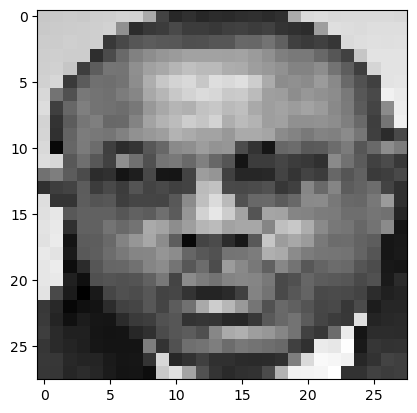

In [53]:
name = predict(images,names,norms)

In [54]:
print(name)

Hailemariam
